## BEFORE RUNNING THIS

- Make sure you have the python libraries in the next block
- Install global fire ignition data from [Nasa EarthData](https://search.earthdata.nasa.gov/search/granules?p=C2389158955-ORNL_CLOUD!C2389158955-ORNL_CLOUD); the relevant file is the zip one

In [6]:
from dbfread import DBF
import rasterio
import json
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [ ]:
def load_fires(path: str):
    fire_path = path
    fire_table = DBF(fire_path, load=True)
    return fire_table

fire_file = load_fires("./Global_Fire_Ignitions_2015/Global_fire_atlas_V1_ignitions_2015.dbf")

In [3]:
def print_first_fires(table: DBF, limit: int) -> None: 
    for record in table:
        pretty_data = json.dumps(record, indent=4)
        print(pretty_data)   
        limit -= 1
        if limit == 0:
            break

def print_biggest_fires(table: DBF, limit: int) -> None:
    sorted_fires = sorted(table, key=lambda x: x['size'], reverse=True)
    for record in sorted_fires[:limit]:
        pretty_data = json.dumps(record, indent=4)
        print(pretty_data)

# print_first_fires(fire_file, 5)
print_biggest_fires(fire_file, 5)

{
    "fire_ID": 806239,
    "latitude": 48.3896,
    "longitude": 76.9411,
    "size": 5895.58,
    "perimeter": 1351.03,
    "start_date": "2015-07-28",
    "start_DOY": 209.0,
    "end_date": "2015-08-22",
    "end_DOY": 234.0,
    "duration": 26.0,
    "expansion": 226.75,
    "fire_line": 258.8,
    "speed": 27.55,
    "direction": 2.0,
    "direction_s": "northeast",
    "landcover": 10.0,
    "landcover_s": "Grasslands",
    "tile_ID": "h23v04"
}
{
    "fire_ID": 930418,
    "latitude": -21.0187,
    "longitude": 132.3408,
    "size": 4666.17,
    "perimeter": 1838.11,
    "start_date": "2015-03-28",
    "start_DOY": 87.0,
    "end_date": "2015-04-25",
    "end_DOY": 115.0,
    "duration": 29.0,
    "expansion": 160.9,
    "fire_line": 139.97,
    "speed": 11.73,
    "direction": 8.0,
    "direction_s": "northwest",
    "landcover": 7.0,
    "landcover_s": "Open shrublands",
    "tile_ID": "h30v11"
}
{
    "fire_ID": 939585,
    "latitude": -17.5729,
    "longitude": 136.8901,
 

In [4]:
def visualize_fire_data(data: DBF, limit: int = None):
    sorted_fires = sorted(data, key=lambda x: x['size'], reverse=True)

    print(len(sorted_fires))
    if limit is None:
        limit = len(sorted_fires)
    
    df = pd.DataFrame(sorted_fires[:limit])
    geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
    gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')

    # Load the world map for plotting
    country_path = "./country_map/admin_0_countries.shp"
    world = gpd.read_file(country_path)
    world = gpd.read_file(country_path).to_crs(epsg=4326)

    # Plot the world map
    ax = world.plot(figsize=(15, 10), color='lightgray', edgecolor='black')

    # Plot fire points with size proportional to "size" attribute (scaled for visibility)
    # The 's' parameter in scatter is marker area in points^2, scaling size as needed
    marker_sizes = gdf['size'] / 1000  # Adjust divisor for marker size scaling

    gdf.plot(ax=ax, kind='scatter', x='longitude', y='latitude', s=marker_sizes, color='red', alpha=0.6)

    plt.title("Fire Events Plotted by Size")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()


944961


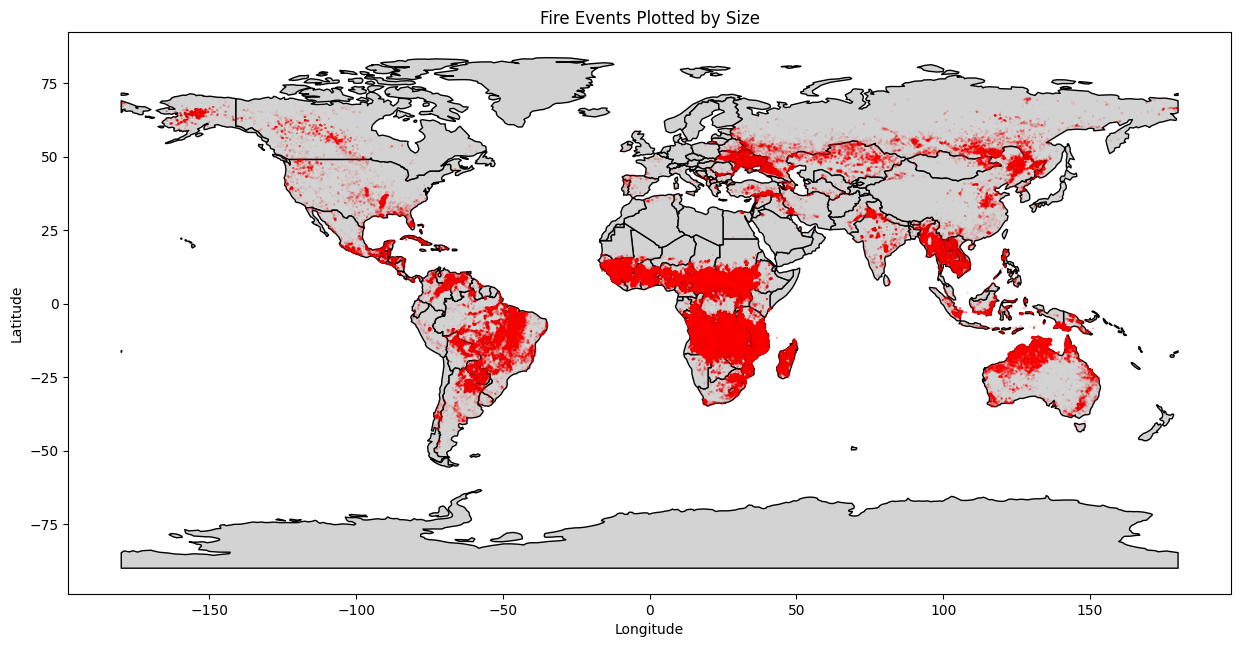

In [5]:
visualize_fire_data(fire_file)